# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

In [3]:
root,dirs,_=next(os.walk(r"C:\Users\vivek\python\Exercises\digit-recognizer\mnist"))

In [4]:
arr=[]
label=[]
for i in dirs:
    _,_,files=next(os.walk(r"C:\Users\vivek\python\Exercises\digit-recognizer\mnist\{}".format(i)))
    for j in files:
        img = Image.open(f"mnist/{i}/{j}")
        arr.append(np.array(img).flatten().tolist())
        label.append(i)     

In [5]:
# Converting  the arrays into dataframe with corresponding pixel value as column name and label as the letter
%%time
data=pd.DataFrame(arr,columns=['pixel'+f'{i}' for i in range(784)])
data['label']=label

Wall time: 1min 9s


In [6]:
# displaying top 5 elements of dataframe
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [7]:
# saving the converted dataframe as csv file
data.to_csv('data.csv')

In [2]:
# reading and removing the redundant column from the CSV.
data=pd.read_csv('data.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)
# shuffling the data in the CSV file while reading
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [3]:
# Shape of the csv file
data.shape

(372451, 785)

In [10]:
# Identifying the distribution of the data corresponding to each letter
data.label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

### Observation
<br>
<li> As can be seen, the data is unevenly distributde among the labels

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


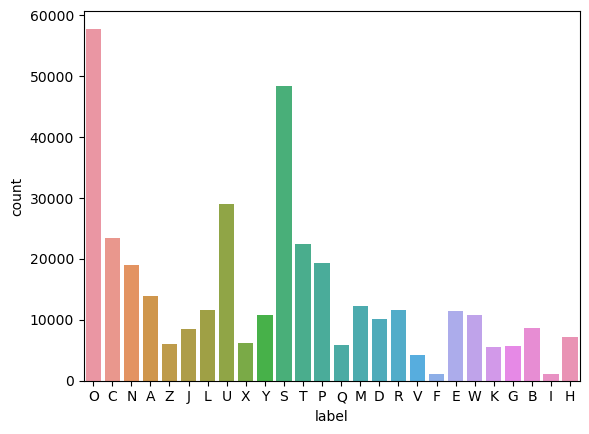

In [11]:
# Visualizing the distribution of the labels
sns.countplot(data.label)
plt.show()

In [12]:
# generating random numbers within the dimensions of the dataset
r_index=np.random.randint(0,372451,4)
r_index

array([313865,  25686, 361869, 195420])

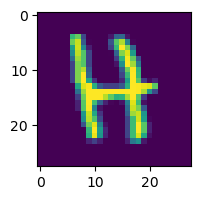

In [13]:
plt.figure(figsize=(2,2))
plt.imshow(data.iloc[r_index[1]][:-1].values.reshape((28, 28)).astype('int'))

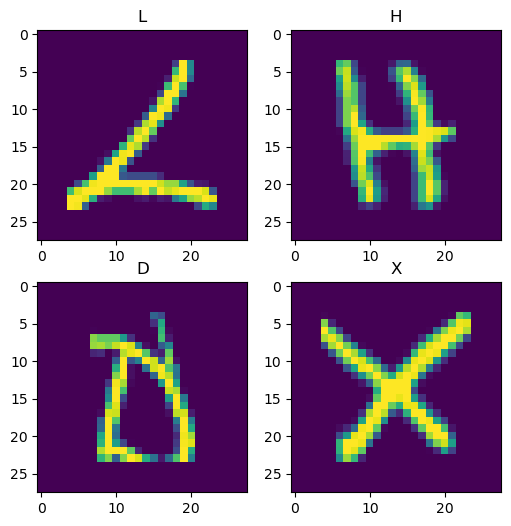

In [14]:
plt.figure(figsize=(6,6))
for i in range(len(r_index)):
    plt.subplot(2,2,i+1)    
    plt.title(data.label[r_index[i]])
    plt.imshow(data.iloc[r_index[i]][:-1].values.reshape((28, 28)).astype('int'))

##### Train Test Split

In [4]:
X=data[data.columns[:-1]]
y=data.label

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75, random_state=0,stratify=y)

In [6]:
print(x_train.shape, x_test.shape,'\n',y_train.shape,y_test.shape)

(279338, 784) (93113, 784) 
 (279338,) (93113,)


#### Training and Testing

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Logistic Regression

In [22]:
# Initiating the classifier class and training the algorith with the split data
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Predicting the data
y_test_pred=classifier.predict(x_test)

### Accuracy of the model

In [24]:
lr_accuracy=metrics.accuracy_score(y_test_pred,y_test)
lr_accuracy

0.8783628494410018

<AxesSubplot:>

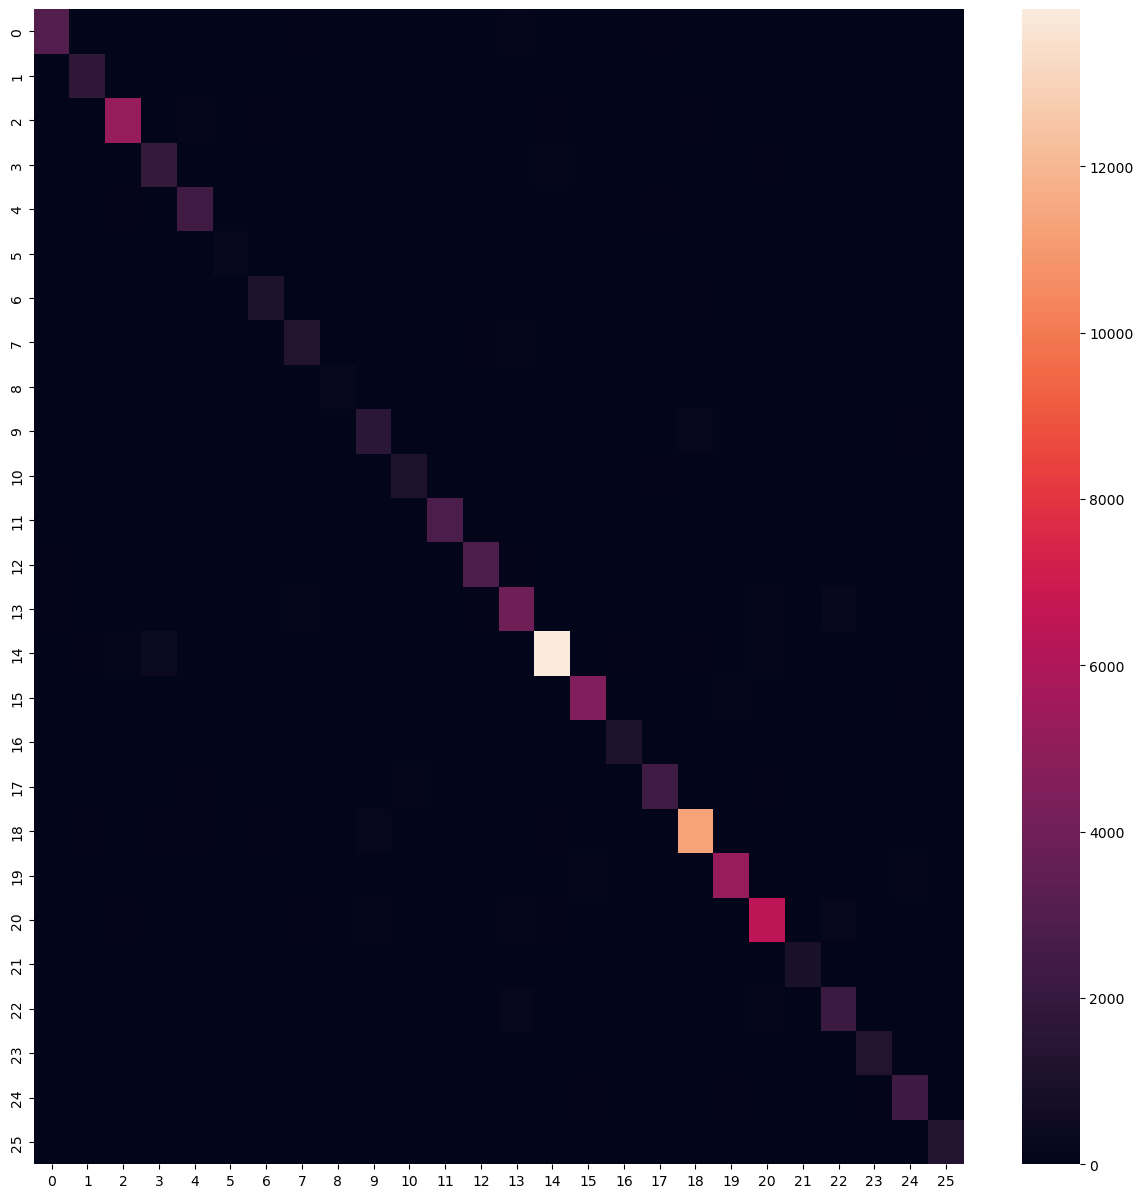

In [25]:
conf_mtrx=metrics.confusion_matrix(y_test_pred,y_test)
plt.figure(figsize=(15,15))
sns.heatmap(conf_mtrx)

In [26]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.84      0.87      0.85      3468
           B       0.86      0.81      0.84      2167
           C       0.90      0.90      0.90      5852
           D       0.82      0.77      0.79      2533
           E       0.84      0.80      0.82      2860
           F       0.93      0.79      0.86       291
           G       0.83      0.77      0.80      1440
           H       0.77      0.72      0.74      1804
           I       0.88      0.81      0.84       280
           J       0.78      0.73      0.76      2123
           K       0.76      0.76      0.76      1401
           L       0.92      0.94      0.93      2897
           M       0.88      0.89      0.89      3084
           N       0.81      0.82      0.81      4753
           O       0.92      0.96      0.94     14456
           P       0.90      0.92      0.91      4835
           Q       0.84      0.76      0.80      1453
           R       0.79    

In [27]:
algo_accuracy=[]
algo_accuracy.append(lr_accuracy)

## KNN Classifier

In [28]:
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_test_pred=classifier.predict(x_test)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
knn_accuracy=metrics.accuracy_score(y_test_pred,y_test)
knn_accuracy

0.9589316207189115

<AxesSubplot:>

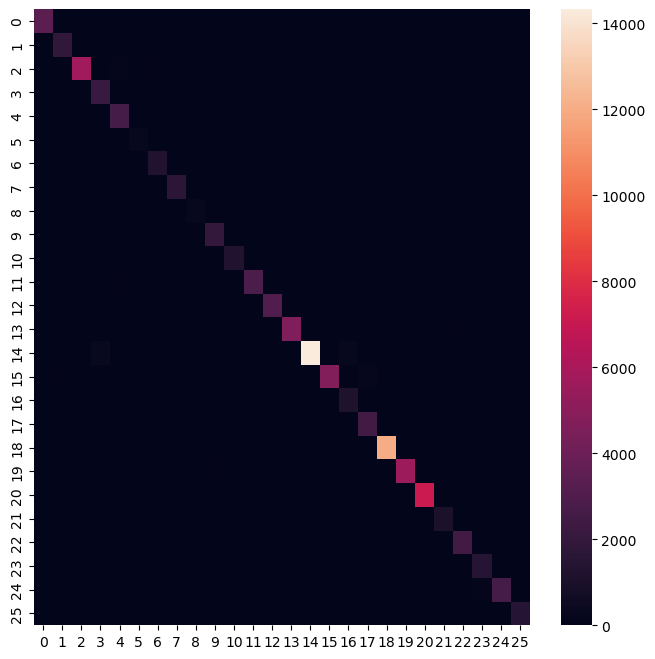

In [35]:
conf_mtrx=metrics.confusion_matrix(y_test_pred,y_test)
plt.figure(figsize=(8,8))
sns.heatmap(conf_mtrx)

In [36]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.94      0.97      0.96      3468
           B       0.98      0.87      0.92      2167
           C       0.94      0.98      0.96      5852
           D       0.94      0.86      0.90      2533
           E       0.98      0.91      0.94      2860
           F       0.93      0.89      0.91       291
           G       0.97      0.86      0.91      1440
           H       0.92      0.92      0.92      1804
           I       0.97      0.88      0.92       280
           J       0.94      0.92      0.93      2123
           K       0.96      0.91      0.93      1401
           L       0.93      0.98      0.95      2897
           M       0.99      0.96      0.97      3084
           N       0.95      0.97      0.96      4753
           O       0.95      0.99      0.97     14456
           P       0.91      0.98      0.95      4835
           Q       0.97      0.77      0.86      1453
           R       0.97    

In [37]:
algo_accuracy.append(knn_accuracy)

## Support Vectore Classifier

In [39]:
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [40]:
y_test_pred=classifier.predict(x_test)
svc_accuracy=metrics.accuracy_score(y_test_pred,y_test)
svc_accuracy

0.980711608475723

In [41]:
algo_accuracy.append(svc_accuracy)

<AxesSubplot:>

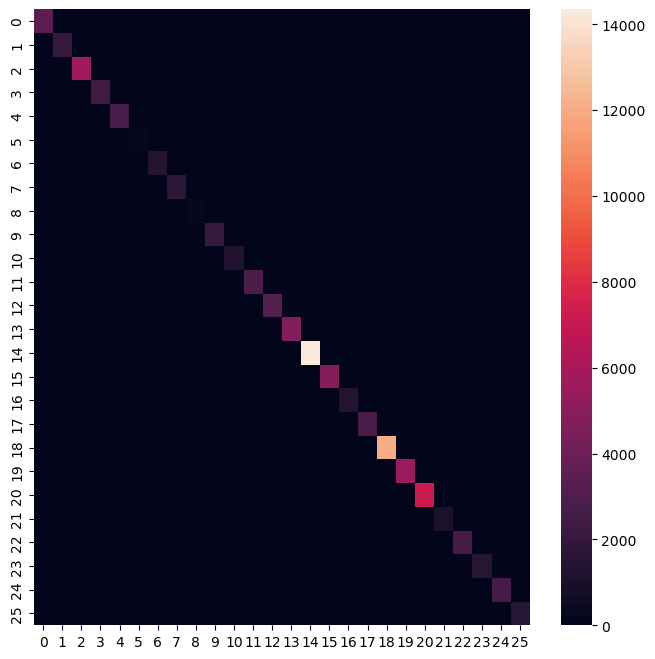

In [42]:
conf_mtrx=metrics.confusion_matrix(y_test_pred,y_test)
plt.figure(figsize=(8,8))
sns.heatmap(conf_mtrx)

In [45]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.96      0.99      0.97      3468
           B       0.98      0.97      0.97      2167
           C       0.98      0.99      0.99      5852
           D       0.95      0.95      0.95      2533
           E       0.99      0.97      0.98      2860
           F       0.98      0.96      0.97       291
           G       0.98      0.95      0.96      1440
           H       0.97      0.93      0.95      1804
           I       1.00      0.95      0.97       280
           J       0.96      0.96      0.96      2123
           K       0.96      0.95      0.96      1401
           L       0.98      0.99      0.98      2897
           M       0.98      0.98      0.98      3084
           N       0.97      0.98      0.98      4753
           O       0.99      0.99      0.99     14456
           P       0.98      0.99      0.99      4835
           Q       0.98      0.96      0.97      1453
           R       0.98    

## Decision Tree Classifier

In [46]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_test_pred=classifier.predict(x_test)
dt_accuracy=metrics.accuracy_score(y_test_pred,y_test)
algo_accuracy.append(dt_accuracy)
dt_accuracy

0.9466562134181049

<AxesSubplot:>

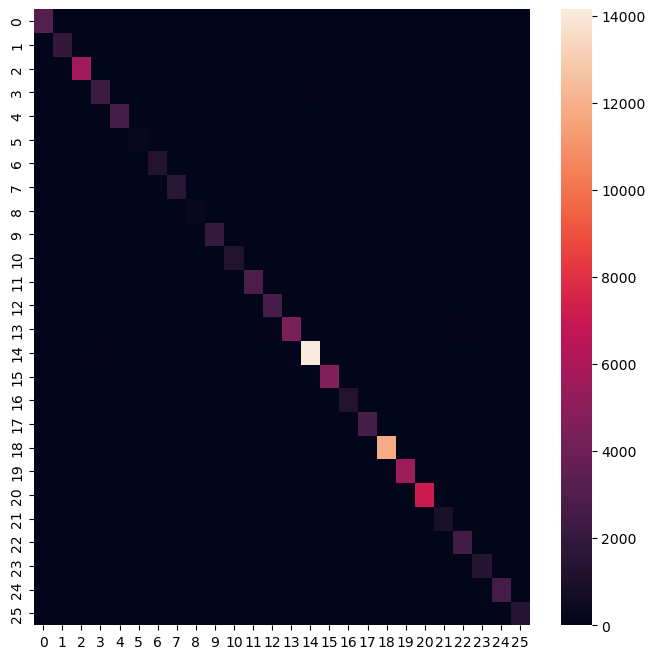

In [48]:
conf_mtrx=metrics.confusion_matrix(y_test_pred,y_test)
plt.figure(figsize=(8,8))
sns.heatmap(conf_mtrx)

In [49]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.92      0.92      0.92      3468
           B       0.90      0.88      0.89      2167
           C       0.96      0.97      0.97      5852
           D       0.90      0.90      0.90      2533
           E       0.92      0.92      0.92      2860
           F       0.88      0.80      0.84       291
           G       0.91      0.89      0.90      1440
           H       0.86      0.87      0.86      1804
           I       0.91      0.82      0.86       280
           J       0.90      0.91      0.91      2123
           K       0.90      0.89      0.90      1401
           L       0.96      0.96      0.96      2897
           M       0.93      0.87      0.90      3084
           N       0.93      0.94      0.94      4753
           O       0.98      0.98      0.98     14456
           P       0.96      0.97      0.96      4835
           Q       0.87      0.87      0.87      1453
           R       0.91    

## Random Forest

In [50]:
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_test_pred=classifier.predict(x_test)
rf_accuracy=metrics.accuracy_score(y_test_pred,y_test)
algo_accuracy.append(rf_accuracy)
rf_accuracy

0.9863391792767927

<AxesSubplot:>

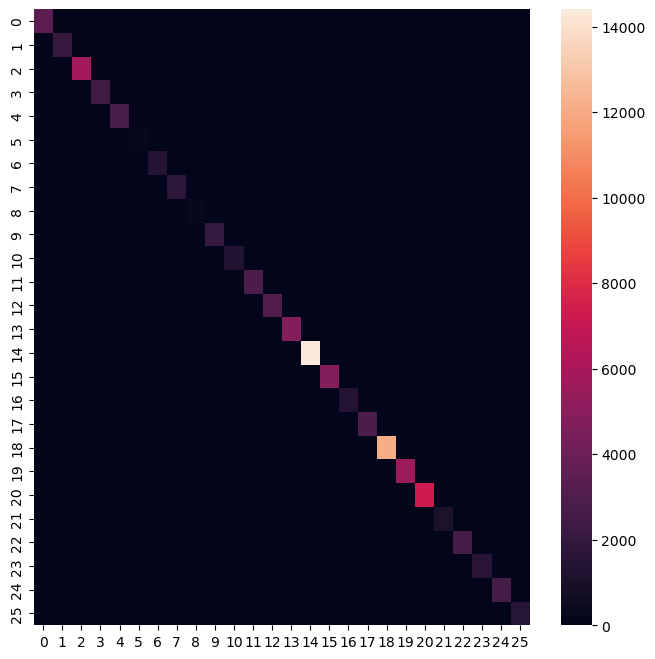

In [52]:
conf_mtrx=metrics.confusion_matrix(y_test_pred,y_test)
plt.figure(figsize=(8,8))
sns.heatmap(conf_mtrx)

In [53]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.97      0.99      0.98      3468
           B       0.99      0.97      0.98      2167
           C       0.99      0.99      0.99      5852
           D       0.98      0.95      0.96      2533
           E       0.99      0.98      0.98      2860
           F       0.99      0.92      0.95       291
           G       0.99      0.96      0.97      1440
           H       0.98      0.95      0.97      1804
           I       1.00      0.96      0.98       280
           J       0.99      0.97      0.98      2123
           K       0.98      0.96      0.97      1401
           L       0.99      0.99      0.99      2897
           M       0.98      0.98      0.98      3084
           N       0.98      0.99      0.98      4753
           O       0.99      1.00      0.99     14456
           P       0.99      0.99      0.99      4835
           Q       0.99      0.95      0.97      1453
           R       0.98    

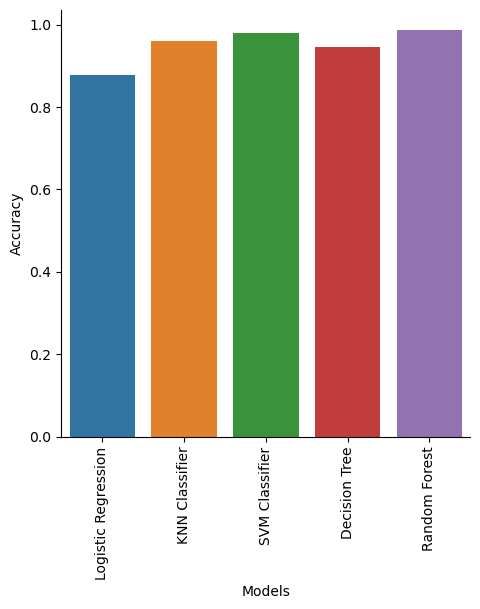

In [63]:
labels = ['Logistic Regression', 'KNN Classifier', 'SVM Classifier', 'Decision Tree', 'Random Forest']
acc_plot = pd.DataFrame({'Models': labels, 'Accuracy': algo_accuracy})
sns.catplot(x='Models', y='Accuracy', kind='bar', data=acc_plot)
plt.xticks(rotation=90)
plt.show()